In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Data imports

In [18]:
# read data for Phola
data_for_model = pd.read_csv(r'C:\Users\Shivm\Documents\Masters\Research Project\Eskom air quality data\Eskom Model\PM2.5 Models\Combined Station Data.csv')
data_for_model.drop(columns=['Location_Marapong', 'Location_Medupi', 'Location_Chicken Farm'], inplace=True)
data_for_model = data_for_model[data_for_model['Location_Phola']==True]
data_for_model['NO1'] = data_for_model['NO1'].fillna(data_for_model['NOX'] - data_for_model['NO2'])

data_for_model

,Date,Wind,Wind Dir,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Temp,NO1,Date Time,Hour,Month,DayOfWeek,Wind_lag1,Wind Dir_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,wind_x_lag1,wind_y_lag1,PM2.5_lag1,Pressure_lag1,Temp_lag1,NO1_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,Wind Dir_roll3_mean,Wind Dir_roll3_std,Wind Dir_roll6_mean,Wind Dir_roll6_std,Wind Dir_roll12_mean,Wind Dir_roll12_std,Wind Dir_roll24_mean,Wind Dir_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,wind_x_roll3_mean,wind_x_roll3_std,wind_x_roll6_mean,wind_x_roll6_std,wind_x_roll12_mean,wind_x_roll12_std,wind_x_roll24_mean,wind_x_roll24_std,wind_y_roll3_mean,wind_y_roll3_std,wind_y_roll6_mean,wind_y_roll6_std,wind_y_roll12_mean,wind_y_roll12_std,wind_y_roll24_mean,wind_y_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Temp_roll3_mean,Temp_roll3_std,Temp_roll6_mean,Temp_roll6_std,Temp_roll12_mean,Temp_roll12_std,Temp_roll24_mean,Temp_roll24_std,NO1_roll3_mean,NO1_roll3_std,NO1_roll6_mean,NO1_roll6_std,NO1_roll12_mean,NO1_roll12_std,NO1_roll24_mean,NO1_roll24_std,Location_Camden,Location_Grootvlei,Location_Komati,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend
573306,2014/01/01 00:00:00,0.963000,127.8000,20.380,12.871,22.070,35.97,0.760919,-0.590229,NaN,NaN,15.28,5.0490,2014-01-01 00:00:00,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.963000,NaN,0.963000,NaN,0.963000,NaN,0.963000,NaN,127.800000,NaN,127.800000,NaN,127.800000,NaN,127.800000,NaN,20.380000,NaN,20.380000,NaN,20.380000,NaN,20.380000,NaN,12.871000,NaN,12.871000,NaN,12.871000,NaN,12.871000,NaN,22.070000,NaN,22.070000,NaN,22.070000,NaN,22.070000,NaN,35.970000,NaN,35.970000,NaN,35.970000,NaN,35.970000,NaN,0.760919,NaN,0.760919,NaN,0.760919,NaN,0.760919,NaN,-0.590229,NaN,-0.590229,NaN,-0.590229,NaN,-0.590229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.280000,NaN,15.280000,NaN,15.280000,NaN,15.280000,NaN,5.049000,NaN,5.049000,NaN,5.049000,NaN,5.049000,NaN,False,False,False,True,False,False,True,False,True,False
573307,2014/01/01 01:00:00,2.012000,145.7000,9.890,8.323,20.760,70.20,1.133814,-1.662110,NaN,NaN,14.56,8.4318,2014-01-01 01:00:00,1.0,1.0,2.0,0.963000,127.8000,20.380,12.871,22.070,35.97,0.760919,-0.590229,NaN,NaN,15.28,5.0490,1.487500,0.741755,1.487500,0.741755,1.487500,0.741755,1.487500,0.741755,136.750000,12.657211,136.750000,12.657211,136.750000,12.657211,136.750000,12.657211,15.135000,7.417550,15.135000,7.417550,15.135000,7.417550,15.135000,7.417550,10.597000,3.215922,10.597000,3.215922,10.597000,3.215922,10.597000,3.215922,21.415000,0.926310,21.415000,0.926310,21.415000,0.926310,21.415000,0.926310,53.085000,24.204265,53.085000,24.204265,53.085000,24.204265,53.085000,24.204265,0.947367,0.263677,0.947367,0.263677,0.947367,0.263677,0.947367,0.263677,-1.126170,0.757934,-1.126170,0.757934,-1.126170,0.757934,-1.126170,0.757934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.920000,0.509117,14.920000,0.509117,14.920000,0.509117,14.920000,0.509117,6.740400,2.392001,6.740400,2.392001,6.740400,2.392001,6.740400,2.392001,False,False,False,True,False,False,True,False,True,False
573308,2014/01/01 02:00:00,1.2

In [19]:
#null checks
data_for_model.isna().sum()

Date                   0
Wind                3091
Wind Dir            3053
SO2                13873
NO2                14008
                   ...  
Season_Spring          0
Season_Summer          0
Season_Winter          0
DayType_Weekday        0
DayType_Weekend        0
Length: 135, dtype: int64

In [20]:
data_for_model['Date Time'] = pd.to_datetime(data_for_model['Date Time'])
data_for_model['Year'] = data_for_model['Date Time'].dt.year
data_for_model.drop(columns=['Date', 'Date Time'], inplace=True)


In [21]:
data_for_model.shape

(135519, 134)

## Create Target variable and rolling features

In [22]:
data_for_model['PM2.5_lag1'] = data_for_model['PM2.5'].shift(1)
data_for_model['PM2.5_lag2'] = data_for_model['PM2.5'].shift(2)
data_for_model['PM2.5_lag3'] = data_for_model['PM2.5'].shift(3)
data_for_model['PM2.5_t+1'] = data_for_model['PM2.5'].shift(-1)
#data_for_model['PM2.5_t+6'] = data_for_model['PM2.5'].shift(-6)
#data_for_model['PM2.5_t+12'] = data_for_model['PM2.5'].shift(-12)


# Rolling means with different windows, shifted by 1 to prevent leakage
# data_for_model['PM2.5_roll3_mean'] = data_for_model['PM2.5'].rolling(window=3).mean().shift(1)
# data_for_model['PM2.5_roll6_mean'] = data_for_model['PM2.5'].rolling(window=6).mean().shift(1)
# data_for_model['PM2.5_roll12_mean'] = data_for_model['PM2.5'].rolling(window=12).mean().shift(1)
# data_for_model['PM2.5_roll24_mean'] = data_for_model['PM2.5'].rolling(window=24).mean().shift(1)
# data_for_model['PM2.5_roll3_std'] = data_for_model['PM2.5'].rolling(3).std().shift(1)
# data_for_model['PM2.5_roll6_std'] = data_for_model['PM2.5'].rolling(6).std().shift(1)
# data_for_model['PM2.5_roll12_std'] = data_for_model['PM2.5'].rolling(12).std().shift(1)
# data_for_model['PM2.5_roll24_std'] = data_for_model['PM2.5'].rolling(24).std().shift(1)
data_for_model['PM2.5_diff1'] = data_for_model['PM2.5'] - data_for_model['PM2.5'].shift(1)
data_for_model['Temp_diff1'] = data_for_model['Temp'] - data_for_model['Temp'].shift(1)


data_for_model = data_for_model.dropna().reset_index(drop=True)
# # # Split by year
df_train = data_for_model[(data_for_model['Year'] >= 2005) & (data_for_model['Year'] <= 2015)]
df_test = data_for_model[data_for_model['Year'] == 2016]
df_val = data_for_model[data_for_model['Year'] == 2017]


In [23]:
data_for_model

,Wind,Wind Dir,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Temp,NO1,Hour,Month,DayOfWeek,Wind_lag1,Wind Dir_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,wind_x_lag1,wind_y_lag1,PM2.5_lag1,Pressure_lag1,Temp_lag1,NO1_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,Wind Dir_roll3_mean,Wind Dir_roll3_std,Wind Dir_roll6_mean,Wind Dir_roll6_std,Wind Dir_roll12_mean,Wind Dir_roll12_std,Wind Dir_roll24_mean,Wind Dir_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,wind_x_roll3_mean,wind_x_roll3_std,wind_x_roll6_mean,wind_x_roll6_std,wind_x_roll12_mean,wind_x_roll12_std,wind_x_roll24_mean,wind_x_roll24_std,wind_y_roll3_mean,wind_y_roll3_std,wind_y_roll6_mean,wind_y_roll6_std,wind_y_roll12_mean,wind_y_roll12_std,wind_y_roll24_mean,wind_y_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Temp_roll3_mean,Temp_roll3_std,Temp_roll6_mean,Temp_roll6_std,Temp_roll12_mean,Temp_roll12_std,Temp_roll24_mean,Temp_roll24_std,NO1_roll3_mean,NO1_roll3_std,NO1_roll6_mean,NO1_roll6_std,NO1_roll12_mean,NO1_roll12_std,NO1_roll24_mean,NO1_roll24_std,Location_Camden,Location_Grootvlei,Location_Komati,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend,Year,PM2.5_lag2,PM2.5_lag3,PM2.5_t+1,PM2.5_diff1,Temp_diff1
0,3.860382,247.209500,3.379,4.742,3.886,0.669,-3.558992,-1.495368,0.190,844.0,30.41,1.330,16.0,2.0,3.0,3.847970,255.572600,3.379,4.505,5.924,0.671,-3.726621,-0.958733,0.206,844.0,30.35,3.402,4.319023,0.805162,4.203764,0.589024,3.859281,0.609942,3.388125,0.806855,254.348833,6.612927,246.324150,10.033745,236.382100,13.692612,252.058604,25.186775,3.379000,0.000000,3.387250,0.016500,3.387250,0.016500,32.468250,24.489702,4.043333,1.011841,3.167750,1.936268,3.167750,1.936268,13.764636,9.603877,6.386667,2.761226,8.695000,5.137755,8.695000,5.137755,23.975455,15.217917,0.669667,0.001155,0.669500,0.001000,0.669500,0.001000,30.035667,21.774769,-4.152913,0.887498,-3.808257,0.691336,-3.180061,0.907743,-2.921356,0.837765,-1.113890,0.332281,-1.637677,0.673198,-2.004532,0.616857,-1.095499,1.330408,0.206000,0.016000,0.207000,0.013216,0.207000,0.013216,0.214636,0.012816,844.333333,0.57735,844.666667,0.516398,844.833333,0.389249,845.916667,1.665942,30.323333,0.102632,29.586667,0.878286,29.620833,0.695903,29.477917,0.764478,4.370667,3.623446,7.558250,7.028204,7.558250,7.028204,11.969364,6.857731,False,False,False,True,False,False,True,False,True,False,2016,0.222,0.210,0.206,-0.016,0.06
1,4.386316,238.374300,3.312,4.191,4.315,0.669,-3.734912,-2.300043,0.206,845.0,30.04,2.163,16.0,2.0,3.0,3.860382,247.209500,3.379,4.742,3.886,0.669,-3.558992,-1.495368,0.190,844.0,30.41,1.330,4.031556,0.307294,4.194971,0.585190,3.982080,0.547154,3.461564,0.814437,247.052133,8.600230,246.829217,9.428508,238.359575,11.858595,251.419338,25.337116,3.356667,0.038682,3.372200,0.036561,3.372200,0.036561,27.755917,24.178327,4.479333,0.276395,3.372400,1.738177,3.372400,1.738177,11.669273,8.855042,4.708333,1.074427,7.819000,4.861509,7.819000,4.861509,20.209545,14.396823,0.669667,0.001155,0.669400,0.000894,0.669400,0.000894,26.377250,22.775770,-3.673508,0.099261,-3.822160,0.688385,-3.353318,0.779765,-2.972038,0.849054,-1.584715,0.675104,-1.600305,0.618104,-1.996513,0.611907,

## Correlation Matrix to identify best features

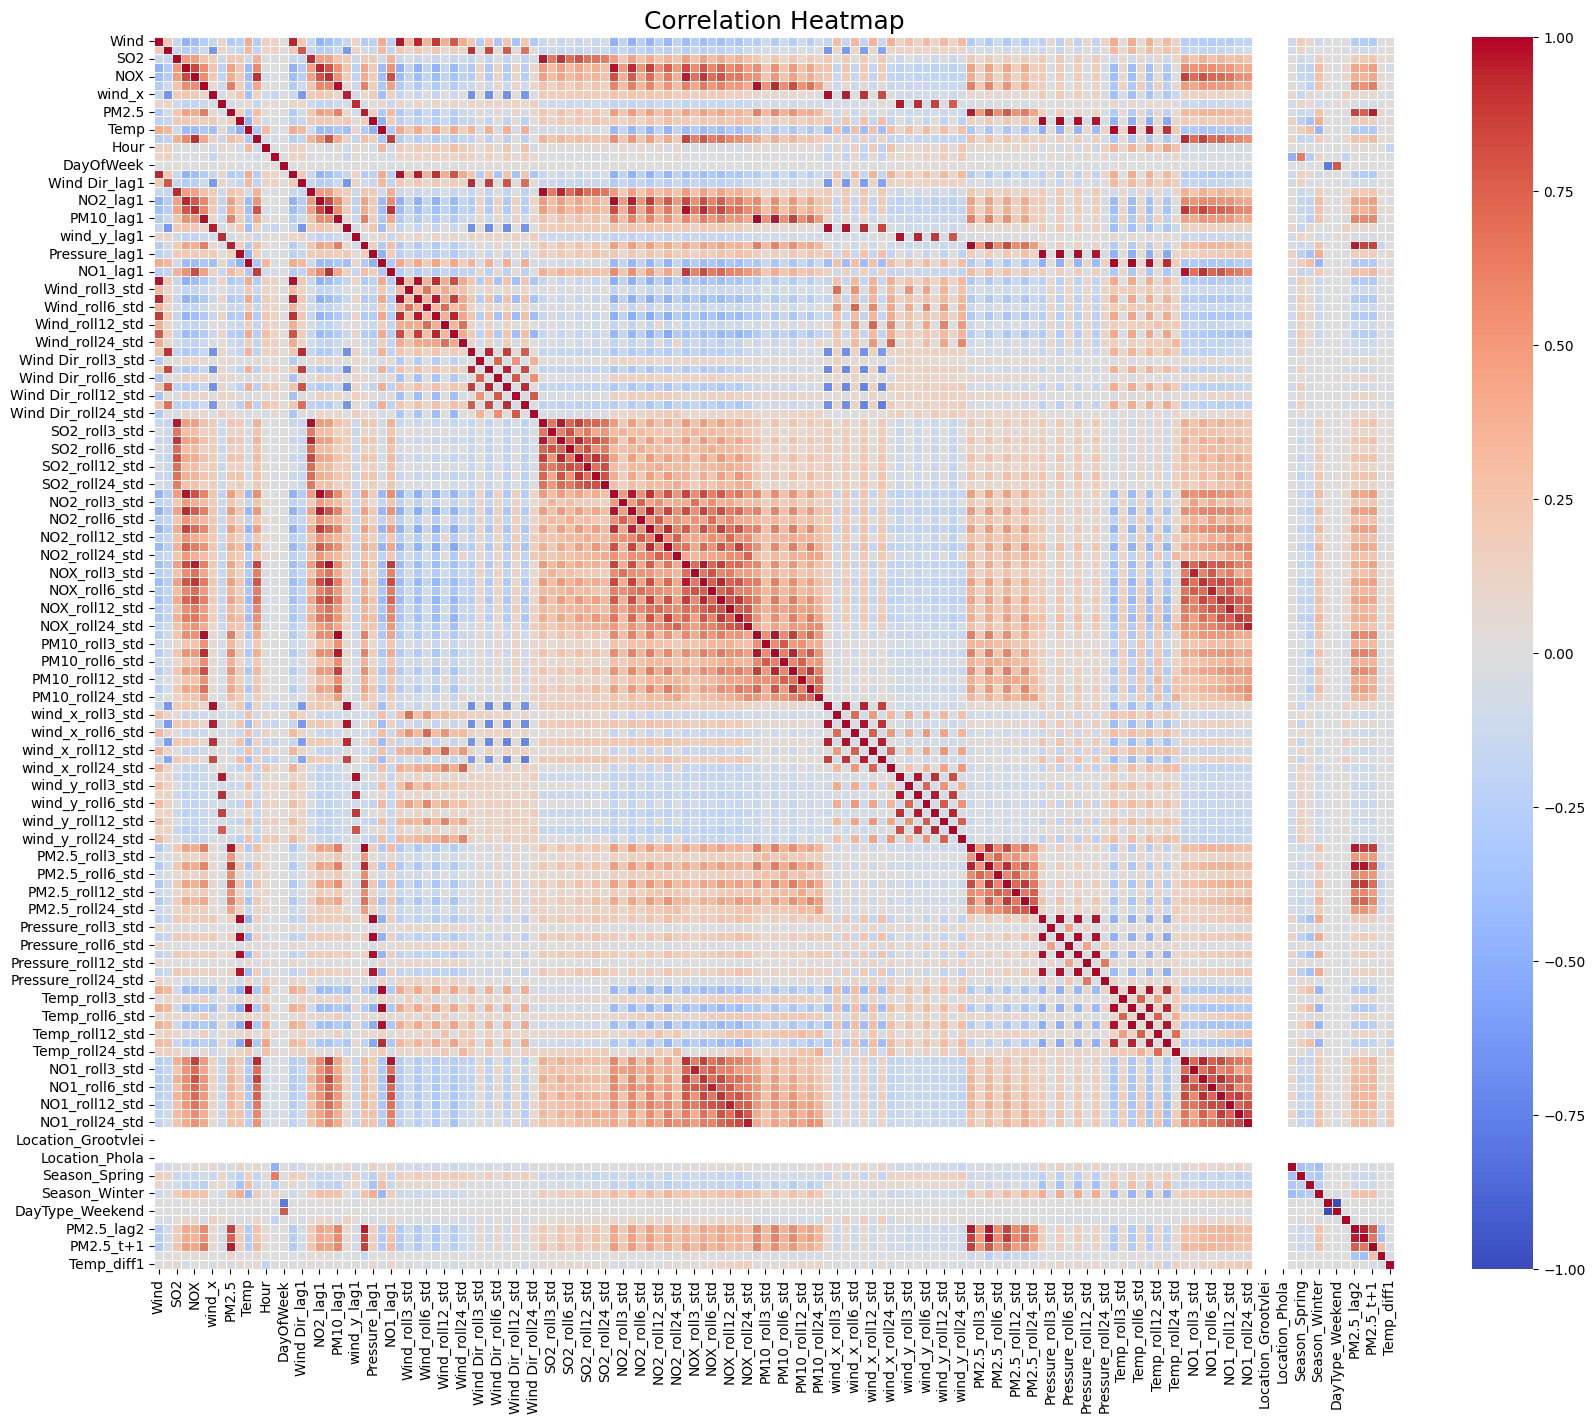

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = data_for_model.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Generate a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap', fontsize=18)
plt.show()


In [25]:
import pandas as pd
import numpy as np

def drop_highly_correlated_features(df, threshold=0.9):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])
    
    # Compute correlation matrix (absolute values)
    corr_matrix = df_numeric.corr().abs()
    
    # Get upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with correlation above threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop the features
    df_reduced = df.drop(columns=to_drop)
    
    return df_reduced, to_drop


In [26]:
# Let's say your dataframe is df_filtered
reduced_df, dropped_columns = drop_highly_correlated_features(data_for_model, threshold=0.9)

print("Dropped columns:", dropped_columns)


Dropped columns: ['NO1', 'Wind_lag1', 'SO2_lag1', 'NO2_lag1', 'NOX_lag1', 'PM10_lag1', 'wind_x_lag1', 'wind_y_lag1', 'PM2.5_lag1', 'Pressure_lag1', 'Temp_lag1', 'NO1_lag1', 'Wind_roll3_mean', 'Wind_roll6_mean', 'Wind_roll12_mean', 'Wind_roll24_mean', 'Wind Dir_roll3_mean', 'Wind Dir_roll6_mean', 'Wind Dir_roll12_mean', 'Wind Dir_roll24_mean', 'SO2_roll3_mean', 'SO2_roll6_mean', 'SO2_roll12_mean', 'SO2_roll24_mean', 'NO2_roll3_mean', 'NO2_roll6_mean', 'NO2_roll12_mean', 'NO2_roll24_mean', 'NOX_roll3_mean', 'NOX_roll6_mean', 'NOX_roll12_mean', 'NOX_roll24_mean', 'PM10_roll3_mean', 'PM10_roll6_mean', 'PM10_roll12_mean', 'PM10_roll24_mean', 'wind_x_roll3_mean', 'wind_x_roll6_mean', 'wind_x_roll12_mean', 'wind_x_roll24_mean', 'wind_y_roll3_mean', 'wind_y_roll6_mean', 'wind_y_roll12_mean', 'wind_y_roll24_mean', 'PM2.5_roll3_mean', 'PM2.5_roll6_mean', 'PM2.5_roll12_mean', 'Pressure_roll3_mean', 'Pressure_roll6_mean', 'Pressure_roll12_mean', 'Pressure_roll24_mean', 'Temp_roll3_mean', 'Temp_rol

In [27]:
reduced_df

,Wind,Wind Dir,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Temp,Hour,Month,DayOfWeek,Wind Dir_lag1,Wind_roll3_std,Wind_roll6_std,Wind_roll12_std,Wind_roll24_std,Wind Dir_roll3_std,Wind Dir_roll6_std,Wind Dir_roll12_std,Wind Dir_roll24_std,SO2_roll3_std,SO2_roll6_std,SO2_roll12_std,SO2_roll24_std,NO2_roll3_std,NO2_roll6_std,NO2_roll12_std,NO2_roll24_std,NOX_roll3_std,NOX_roll6_std,NOX_roll12_std,NOX_roll24_std,PM10_roll3_std,PM10_roll6_std,PM10_roll12_std,PM10_roll24_std,wind_x_roll3_std,wind_x_roll6_std,wind_x_roll12_std,wind_x_roll24_std,wind_y_roll3_std,wind_y_roll6_std,wind_y_roll12_std,wind_y_roll24_std,PM2.5_roll3_std,PM2.5_roll6_std,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_std,Pressure_roll6_std,Pressure_roll12_std,Pressure_roll24_std,Temp_roll3_std,Temp_roll6_std,Temp_roll12_std,Temp_roll24_std,Location_Camden,Location_Grootvlei,Location_Komati,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend,Year,PM2.5_diff1,Temp_diff1
0,3.860382,247.209500,3.379,4.742,3.886,0.669,-3.558992,-1.495368,0.190,844.0,30.41,16.0,2.0,3.0,255.572600,0.805162,0.589024,0.609942,0.806855,6.612927,10.033745,13.692612,25.186775,0.000000,0.016500,0.016500,24.489702,1.011841,1.936268,1.936268,9.603877,2.761226,5.137755,5.137755,15.217917,0.001155,0.001000,0.001000,21.774769,0.887498,0.691336,0.907743,0.837765,0.332281,0.673198,0.616857,1.330408,0.016000,0.013216,0.013216,0.214636,0.012816,0.57735,0.516398,0.389249,1.665942,0.102632,0.878286,0.695903,0.764478,False,False,False,True,False,False,True,False,True,False,2016,-0.016,0.06
1,4.386316,238.374300,3.312,4.191,4.315,0.669,-3.734912,-2.300043,0.206,845.0,30.04,16.0,2.0,3.0,247.209500,0.307294,0.585190,0.547154,0.814437,8.600230,9.428508,11.858595,25.337116,0.038682,0.036561,0.036561,24.178327,0.276395,1.738177,1.738177,8.855042,1.074427,4.861509,4.861509,14.396823,0.001155,0.000894,0.000894,22.775770,0.099261,0.688385,0.779765,0.849054,0.675104,0.618104,0.611907,1.350188,0.009238,0.011454,0.011454,0.211909,0.010858,0.57735,0.516398,0.389249,1.659404,0.198578,0.734003,0.675666,0.701098,False,False,False,True,False,False,True,False,True,False,2016,0.016,-0.37
2,4.195706,246.438800,3.380,5.577,6.433,0.672,-3.845925,-1.677143,0.213,845.0,30.14,16.0,2.0,3.0,238.374300,0.266265,0.514575,0.508074,0.821269,4.893719,9.216561,10.025568,25.345171,0.038974,0.032856,0.032856,22.781516,0.697833,1.796399,1.796399,7.912553,1.363645,4.384927,4.384927,12.917595,0.001732,0.001329,0.001329,22.953499,0.144685,0.621752,0.665898,0.867253,0.422009,0.618426,0.582631,1.351569,0.011790,0.010553,0.010553,0.211091,0.010348,0.57735,0.516398,0.389249,1.648451,0.191398,0.338447,0.662975,0.652382,False,False,False,True,False,False,True,False,True,False,2016,0.007,0.10
3,4.111427,253.295800,3.391,4.935,5.757,0.667,-3.937931,-1.181750,0.213,844.0,30.03,16.0,2.0,3.0,246.438800,0.140830,0.519196,0.508284,0.792013,7.468888,7.780457,9.997182,24.901372,0.042790,0.028803,0.030714,20.105074,0.693625,0.907002,1.700961,6.681570,1.081840,1.937232,4.062256,10.522382,0.002517,0.001761,0.001618,22.541187,0.101657,0.590463,0.662691,0.875435,0.560357,0.529005,0.575459,1.321163,0.004041,0.010746,0.009829,0.211091,0.010348,0.57735,0.547723,0.452267,1.663221,0.060828,0.157945,0.671807,0.620431,False,False,False,True,False,False,True,False,True,False,2016,0.000,-0.11
4,4.291420,252.843300,3.346,5.003,5.938,0.669,-4.100459,-1.265909,0.222,845.0,29.37,16.0,2.0,3.0,253.295800,0.090057,0.222439,0.470059,0.659502,3.834945,6.310044,10.096953,24.465942,0.023459,0.029871,0.030349,17.128421,0.352672,0.473399,1.621456,5.096199,0.349943,1.022192,3.792819,7.753671,0.002517,0.001761,0.001506,21.314737,0.128885,0.188299,0.632017,0.826286,0.265082,0.472880,0.592713,1.291380,0.005196,0.010746,0.010264,0.211091,0.010348,0.57735,0.547723,0.452267,1.641292,0.416453,0.371573,0.665255,0.615420,False,False,False,True,False,False,True,False,True,False,2016,0.009,-0.66
...,...,...,...,...,...,

In [28]:
# Compute correlations with the target
target = 'PM2.5_t+1'
correlations = data_for_model.corr()[target].drop(target)

# Sort by absolute correlation (strongest relationships first)
feature_ranking = correlations.abs().sort_values(ascending=False)

# Display top 15 features most correlated with PM2.5_t+12
print("Top correlated features with PM2.5_t+1:\n")
print(feature_ranking.head(20))

Top correlated features with PM2.5_t+1:

PM2.5                0.958425
PM2.5_roll3_mean     0.882021
PM2.5_lag1           0.865970
PM2.5_roll6_mean     0.791081
PM2.5_lag2           0.758574
PM2.5_roll12_mean    0.709136
PM2.5_lag3           0.662633
PM10                 0.634668
PM10_roll3_mean      0.607361
PM10_lag1            0.601124
PM2.5_roll24_mean    0.591572
PM10_roll6_mean      0.569355
PM2.5_roll6_std      0.520125
PM10_roll12_mean     0.510907
PM2.5_roll3_std      0.501841
NO2_roll3_mean       0.498404
NO2_roll6_mean       0.494373
PM2.5_roll12_std     0.492568
NO2_lag1             0.489116
NO2                  0.484614
Name: PM2.5_t+1, dtype: float64


In [29]:
feature_ranking

PM2.5                 0.958425
PM2.5_roll3_mean      0.882021
PM2.5_lag1            0.865970
PM2.5_roll6_mean      0.791081
PM2.5_lag2            0.758574
                        ...   
Month                 0.000793
Location_Camden            NaN
Location_Grootvlei         NaN
Location_Komati            NaN
Location_Phola             NaN
Name: PM2.5_t+1, Length: 138, dtype: float64

In [30]:
data_for_model

,Wind,Wind Dir,SO2,NO2,NOX,PM10,wind_x,wind_y,PM2.5,Pressure,Temp,NO1,Hour,Month,DayOfWeek,Wind_lag1,Wind Dir_lag1,SO2_lag1,NO2_lag1,NOX_lag1,PM10_lag1,wind_x_lag1,wind_y_lag1,PM2.5_lag1,Pressure_lag1,Temp_lag1,NO1_lag1,Wind_roll3_mean,Wind_roll3_std,Wind_roll6_mean,Wind_roll6_std,Wind_roll12_mean,Wind_roll12_std,Wind_roll24_mean,Wind_roll24_std,Wind Dir_roll3_mean,Wind Dir_roll3_std,Wind Dir_roll6_mean,Wind Dir_roll6_std,Wind Dir_roll12_mean,Wind Dir_roll12_std,Wind Dir_roll24_mean,Wind Dir_roll24_std,SO2_roll3_mean,SO2_roll3_std,SO2_roll6_mean,SO2_roll6_std,SO2_roll12_mean,SO2_roll12_std,SO2_roll24_mean,SO2_roll24_std,NO2_roll3_mean,NO2_roll3_std,NO2_roll6_mean,NO2_roll6_std,NO2_roll12_mean,NO2_roll12_std,NO2_roll24_mean,NO2_roll24_std,NOX_roll3_mean,NOX_roll3_std,NOX_roll6_mean,NOX_roll6_std,NOX_roll12_mean,NOX_roll12_std,NOX_roll24_mean,NOX_roll24_std,PM10_roll3_mean,PM10_roll3_std,PM10_roll6_mean,PM10_roll6_std,PM10_roll12_mean,PM10_roll12_std,PM10_roll24_mean,PM10_roll24_std,wind_x_roll3_mean,wind_x_roll3_std,wind_x_roll6_mean,wind_x_roll6_std,wind_x_roll12_mean,wind_x_roll12_std,wind_x_roll24_mean,wind_x_roll24_std,wind_y_roll3_mean,wind_y_roll3_std,wind_y_roll6_mean,wind_y_roll6_std,wind_y_roll12_mean,wind_y_roll12_std,wind_y_roll24_mean,wind_y_roll24_std,PM2.5_roll3_mean,PM2.5_roll3_std,PM2.5_roll6_mean,PM2.5_roll6_std,PM2.5_roll12_mean,PM2.5_roll12_std,PM2.5_roll24_mean,PM2.5_roll24_std,Pressure_roll3_mean,Pressure_roll3_std,Pressure_roll6_mean,Pressure_roll6_std,Pressure_roll12_mean,Pressure_roll12_std,Pressure_roll24_mean,Pressure_roll24_std,Temp_roll3_mean,Temp_roll3_std,Temp_roll6_mean,Temp_roll6_std,Temp_roll12_mean,Temp_roll12_std,Temp_roll24_mean,Temp_roll24_std,NO1_roll3_mean,NO1_roll3_std,NO1_roll6_mean,NO1_roll6_std,NO1_roll12_mean,NO1_roll12_std,NO1_roll24_mean,NO1_roll24_std,Location_Camden,Location_Grootvlei,Location_Komati,Location_Phola,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,DayType_Weekday,DayType_Weekend,Year,PM2.5_lag2,PM2.5_lag3,PM2.5_t+1,PM2.5_diff1,Temp_diff1
0,3.860382,247.209500,3.379,4.742,3.886,0.669,-3.558992,-1.495368,0.190,844.0,30.41,1.330,16.0,2.0,3.0,3.847970,255.572600,3.379,4.505,5.924,0.671,-3.726621,-0.958733,0.206,844.0,30.35,3.402,4.319023,0.805162,4.203764,0.589024,3.859281,0.609942,3.388125,0.806855,254.348833,6.612927,246.324150,10.033745,236.382100,13.692612,252.058604,25.186775,3.379000,0.000000,3.387250,0.016500,3.387250,0.016500,32.468250,24.489702,4.043333,1.011841,3.167750,1.936268,3.167750,1.936268,13.764636,9.603877,6.386667,2.761226,8.695000,5.137755,8.695000,5.137755,23.975455,15.217917,0.669667,0.001155,0.669500,0.001000,0.669500,0.001000,30.035667,21.774769,-4.152913,0.887498,-3.808257,0.691336,-3.180061,0.907743,-2.921356,0.837765,-1.113890,0.332281,-1.637677,0.673198,-2.004532,0.616857,-1.095499,1.330408,0.206000,0.016000,0.207000,0.013216,0.207000,0.013216,0.214636,0.012816,844.333333,0.57735,844.666667,0.516398,844.833333,0.389249,845.916667,1.665942,30.323333,0.102632,29.586667,0.878286,29.620833,0.695903,29.477917,0.764478,4.370667,3.623446,7.558250,7.028204,7.558250,7.028204,11.969364,6.857731,False,False,False,True,False,False,True,False,True,False,2016,0.222,0.210,0.206,-0.016,0.06
1,4.386316,238.374300,3.312,4.191,4.315,0.669,-3.734912,-2.300043,0.206,845.0,30.04,2.163,16.0,2.0,3.0,3.860382,247.209500,3.379,4.742,3.886,0.669,-3.558992,-1.495368,0.190,844.0,30.41,1.330,4.031556,0.307294,4.194971,0.585190,3.982080,0.547154,3.461564,0.814437,247.052133,8.600230,246.829217,9.428508,238.359575,11.858595,251.419338,25.337116,3.356667,0.038682,3.372200,0.036561,3.372200,0.036561,27.755917,24.178327,4.479333,0.276395,3.372400,1.738177,3.372400,1.738177,11.669273,8.855042,4.708333,1.074427,7.819000,4.861509,7.819000,4.861509,20.209545,14.396823,0.669667,0.001155,0.669400,0.000894,0.669400,0.000894,26.377250,22.775770,-3.673508,0.099261,-3.822160,0.688385,-3.353318,0.779765,-2.972038,0.849054,-1.584715,0.675104,-1.600305,0.618104,-1.996513,0.611907,

## Feature Selection

In [ ]:
features = feature_ranking.head(20).index.tolist()


In [32]:
X = pd.concat([df_train[features], df_test[features]])#data_for_model[features]
y = pd.concat([df_train['PM2.5_t+1'], df_test['PM2.5_t+1']])#data_for_model['PM2.5_t+1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [33]:
y

0          0.206
1          0.213
2          0.213
3          0.222
4          0.199
          ...   
43769     24.710
43770     12.770
43771     39.970
43772     77.290
43773    114.200
Name: PM2.5_t+1, Length: 43774, dtype: float64

## Data splitting for models

In [34]:
# Let's use 80% of the data for training, 20% for testing
split_idx = int(len(X_scaled) * 0.8)

X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


## LSTM Model (Neural Network)

In [35]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/50


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1095/1095 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1184.8916 - val_loss: 82.2184
Epoch 2/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - loss: 81.4514 - val_loss: 74.5385
Epoch 3/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - loss: 75.2756 - val_loss: 74.4367
Epoch 4/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.3408 - val_loss: 73.5851
Epoch 5/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 74.7623 - val_loss: 72.7839
Epoch 6/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 72.5087 - val_loss: 71.6122
Epoch 7/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 70.6280 - val_loss: 71.3288
Epoch 8/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 73.2962 - val_loss: 73.5814
Epoch 9/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 69.6125 - val_loss: 71.5261
Epoch 10/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 68.9715 - val_loss: 70.6055
Epoch 11/50
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 68.1443 - val_loss: 71.7933
Epoch 12/50
1

In [36]:
#Prediction accuracy
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step
R²: 0.9133173241340926
RMSE: 8.303598812254194


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
#Validation data prediction
X_val = df_val[features]
y_val = df_val['PM2.5_t+1']

X_val_scaled = scaler.fit_transform(X_val)


y_pred_val = model.predict(X_val_scaled)

r2 = r2_score(y_val, y_pred_val)
rmse = mean_squared_error(y_val, y_pred_val, squared=False)

print(f"R²: {r2}")
print(f"RMSE: {rmse}")

1114/1114 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step
R²: 0.9489471115115222
RMSE: 9.877398946212683


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
last_known_data = data_for_model.iloc[-1][features].values.reshape(1, -1)
last_known_data_scaled = scaler.transform(last_known_data)

forecast_3hr = model.predict(last_known_data_scaled)[0][0]
print(f"Forecasted PM2.5 (3 hrs ahead): {forecast_3hr}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Forecasted PM2.5 (3 hrs ahead): 3.506808042526245


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


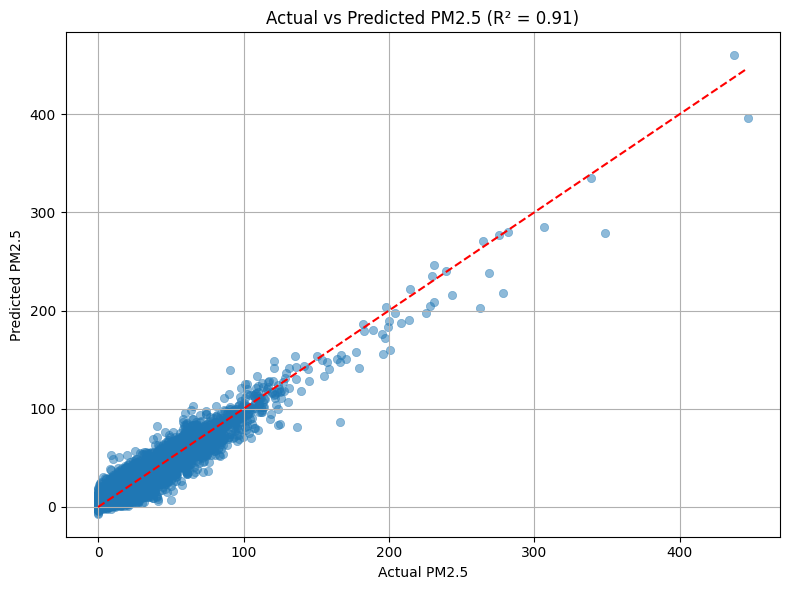

In [39]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title(f'Actual vs Predicted PM2.5 (R² = {r2_score(y_test, y_pred):.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()


In [40]:
y_val

43774    146.900
43775    163.400
43776    187.900
43777    252.300
43778     96.800
          ...   
79412     24.660
79413     15.620
79414     12.350
79415      3.836
79416      0.195
Name: PM2.5_t+1, Length: 35643, dtype: float64

# Testing out XGBoost Regressor and Random Forrest Regressor

In [41]:
X = pd.concat([df_train[features], df_test[features]])#data_for_model[features]
y = pd.concat([df_train['PM2.5_t+1'], df_test['PM2.5_t+1']])#data_for_model['PM2.5_t+1']

In [42]:
#Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#Random Forrest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)


In [44]:
#XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)


## Model Evaluation

In [45]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print("R2 Score:", r2_score(y_true, y_pred))

evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)



Random Forest Performance:
MAE: 5.643193422044546
RMSE: 8.413865079110396
R2 Score: 0.9547624134135086

XGBoost Performance:
MAE: 5.56779000423367
RMSE: 8.246467691988364
R2 Score: 0.9565445487714016


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest: Actual vs Predicted')

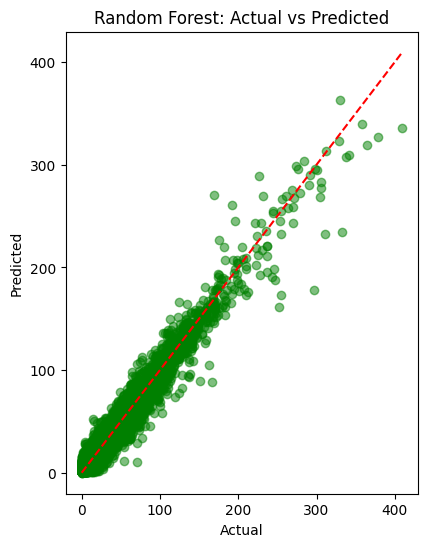

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_preds, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")

Text(0.5, 1.0, 'XGBoost: Actual vs Predicted')

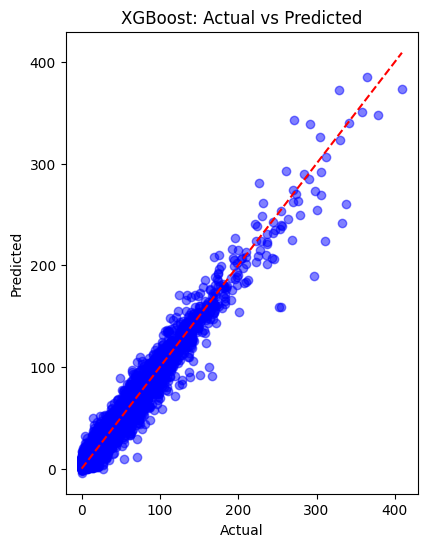

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
plt.scatter(y_test, xgb_preds, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost: Actual vs Predicted")

In [48]:
#Validation performance

rf_val = rf.predict(X_val)

xgb_val = xgb.predict(X_val)

evaluate_model("Random Forrest", y_val, rf_val)
evaluate_model("XGBoost", y_val, xgb_val )


Random Forrest Performance:
MAE: 5.870689773026961
RMSE: 8.78695290883761
R2 Score: 0.9595971755722137

XGBoost Performance:
MAE: 5.673905428010271
RMSE: 9.539396484144822
R2 Score: 0.9523813665746824


c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Shivm\Documents\Masters\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Validation: Actual vs Predicted')

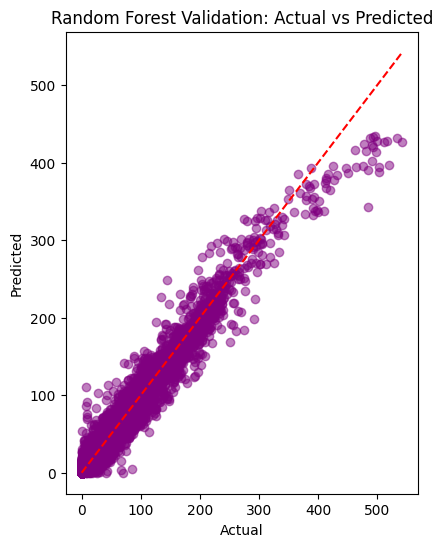

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, rf_val, alpha=0.5, color='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest Validation: Actual vs Predicted")

Text(0.5, 1.0, 'XGBoost Validation: Actual vs Predicted')

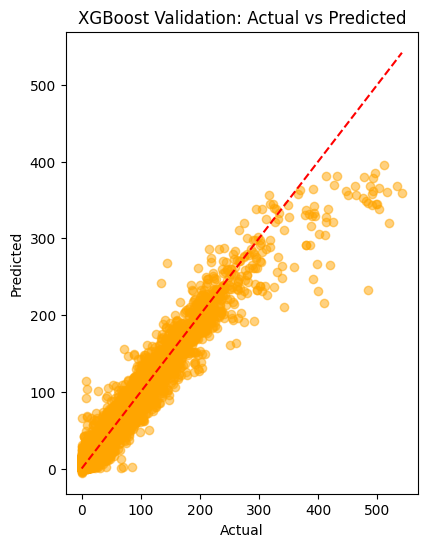

In [50]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.scatter(y_val, xgb_val, alpha=0.5, color='orange')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # ideal line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Validation: Actual vs Predicted")

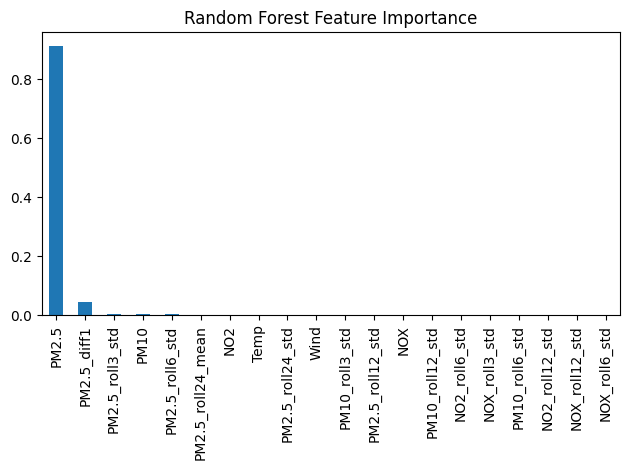

In [51]:
import matplotlib.pyplot as plt

# For Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
rf_importance.plot(kind='bar', title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()




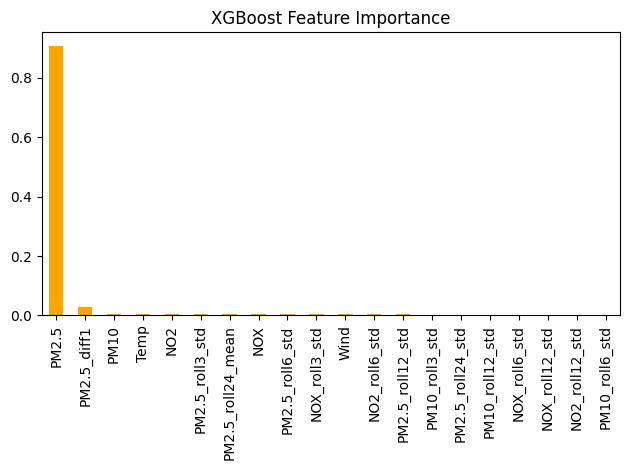

In [52]:
# For XGBoost
xgb_importance = pd.Series(xgb.feature_importances_, index=features).sort_values(ascending=False)
xgb_importance.plot(kind='bar', title='XGBoost Feature Importance', color='orange')
plt.tight_layout()
plt.show()